In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error


matplotlib_inline.backend_inline.set_matplotlib_formats("retina") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "NanumSquareRound")
plt.rcParams["axes.unicode_minus"] = False

### 크롤링

In [116]:
# 필요한 패키지 import
from bs4 import BeautifulSoup
import requests
import pandas as pd

import re 

In [117]:
book_df = pd.DataFrame(columns=['ID', 'Title', 'Rating', 'Author', 'Price', 'Pdate', 'Publisher', 'Btype', 'Salseindex'])

In [118]:
# 가져올 책 범위,ID.. 값 정의
start_id = 97043285 # 125190808
end_id = start_id + 10000

In [ ]:
# # ID를 증가시키며 책 정보 크롤링
# for book_id in range(start_id, end_id + 1):
#     url = f'http://www.yes24.com/Product/Goods/{book_id}'
#     try:
#         r = requests.get (url)
#         if r.status_code == 200:
#             html=r.text
#             soup=BeautifulSoup(html, 'lxml') #  BeautifulSoup 클래스의 인스턴스 생성

#             # title = soup.select_one('#yDetailTopWrap > div.topColRgt > div.gd_infoTop > div > h2').get_text()
#             try:
#                 title = soup.select_one('#yDetailTopWrap > div.topColRgt > div.gd_infoTop > div > h2').get_text()
#             except AttributeError:
#                 title = None # 선택한 요소가 없어서 발생하는 AttributeError 처리

#             try:
#                 rating = soup.select_one('#spanGdRating > a > em').get_text() # .get_text().strip()
#             except AttributeError:
#                 rating = None

#             try:
#                 author = soup.select_one('#yDetailTopWrap > div.topColRgt > div.gd_infoTop > span.gd_pubArea > span.gd_auth > a').get_text()
#             except AttributeError:
#                 author = None

#             btype = 'new'
#             try:
#                 # if soup.select_one('#yDetailTopWrap > div.topColRgt > div.gd_infoTop > div > strong > em').get_text() == "중고도서":
#                 if "중고도서" in soup.select_one('#yDetailTopWrap > div.topColRgt > div.gd_infoTop > div > strong > em').get_text().lower():
#                     price = soup.select_one('#yDetailTopWrap > div.topColRgt > div.gd_infoBot > div.gd_infoTbArea > div:nth-child(1) > table > tbody > tr.accentRow > td > span > em').get_text()  # 판매가격
#                     btype = 'old'
#                 else:
#                     price = soup.select_one('#yDetailTopWrap > div.topColRgt > div.gd_infoBot > div.gd_infoTbArea > div:nth-child(3) > table > tbody > tr:nth-child(2) > td > span > em').get_text()  # 판매가격
#             except AttributeError:
#                 price = None

#             try:
#                 pdate = soup.select_one('#yDetailTopWrap > div.topColRgt > div.gd_infoTop > span.gd_pubArea > span.gd_date').get_text()   # 발행일
#             except AttributeError:
#                 pdate = None

#             try:
#                 publisher = soup.select_one('#yDetailTopWrap > div.topColRgt > div.gd_infoTop > span.gd_pubArea > span.gd_pub > a').get_text()  # 출판사
#             except AttributeError:
#                 publisher = None

#             try:
#                 numbers = re.findall(r'\d+', soup.select_one('#yDetailTopWrap > div.topColRgt > div.gd_infoTop > span.gd_ratingArea > span.gd_sellNum').get_text().replace(',', ''))
#                 number = int(numbers[0]) if numbers else None
#                 salseindex = number # soup.select_one('#yDetailTopWrap > div.topColRgt > div.gd_infoTop > span.gd_ratingArea > span.gd_sellNum').get_text()  # 판매지수
#             except AttributeError:
#                 salseindex = None



#             # book_df = book_df.append({'ID':book_id, 'Title':title, 'Author':author, 'Rating':rating, 'Price':price, 'Pdate':pdate, 'Publisher':publisher, 'Btype':btype}, ignore_index=True)
#             new_row = pd.DataFrame({'ID': [book_id], 'Title': [title], 'Author': [author], 'Rating': [rating], 'Price': [price], 'Pdate': [pdate], 'Publisher': [publisher], 'Btype': [btype], 'Salseindex': [salseindex]})
#             book_df = pd.concat([book_df, new_row], ignore_index=True)

#         else:
#             print('에러발생1')
#     except requests.RequestException as e:
#         # 에러 발생시....
#         print('에러발생2')

In [121]:
book_df.to_csv('book.csv')

### 불러오기

In [123]:
book = pd.read_csv("book.csv").drop(columns=["Unnamed: 0"])

book.tail()

,ID,Title,Rating,Author,Price,Pdate,Publisher,Btype,Salseindex
9996,97053281,인류사를 가로지른 스마트한 발명들 50,NaN,알프리트 슈미츠,"6,700",2014년 06월 10일,서해문집,old,NaN
9997,97053282,NaN,NaN,NaN,NaN,NaN,NaN,new,NaN
9998,97053283,NaN,NaN,NaN,NaN,NaN,NaN,new,NaN
9999,97053284,행복의 기원,NaN,서은국,"10,500",2014년 05월 22일,21세기북스,old,NaN
10000,97053285,NaN,NaN,NaN,NaN,NaN,NaN,new,NaN


### 가격 데이터 타입 변경

In [124]:
# 타입 변경 Price
book["Price"] = book["Price"].str.replace('[^\d.]', '')
book["Price"] = book["Price"].str.replace(',', '').astype("float64")

### 날짜 데이터 타입 변경

In [125]:
book['Pdate'] = pd.to_datetime(book['Pdate'], format='%Y년 %m월 %d일', errors='coerce')

In [126]:
book['Pdate'].head()

0          NaT
1   2020-05-26
2          NaT
3   2020-05-22
4   2020-05-26
Name: Pdate, dtype: datetime64[ns]

### 결측 확인

In [127]:
import missingno.missingno as msno

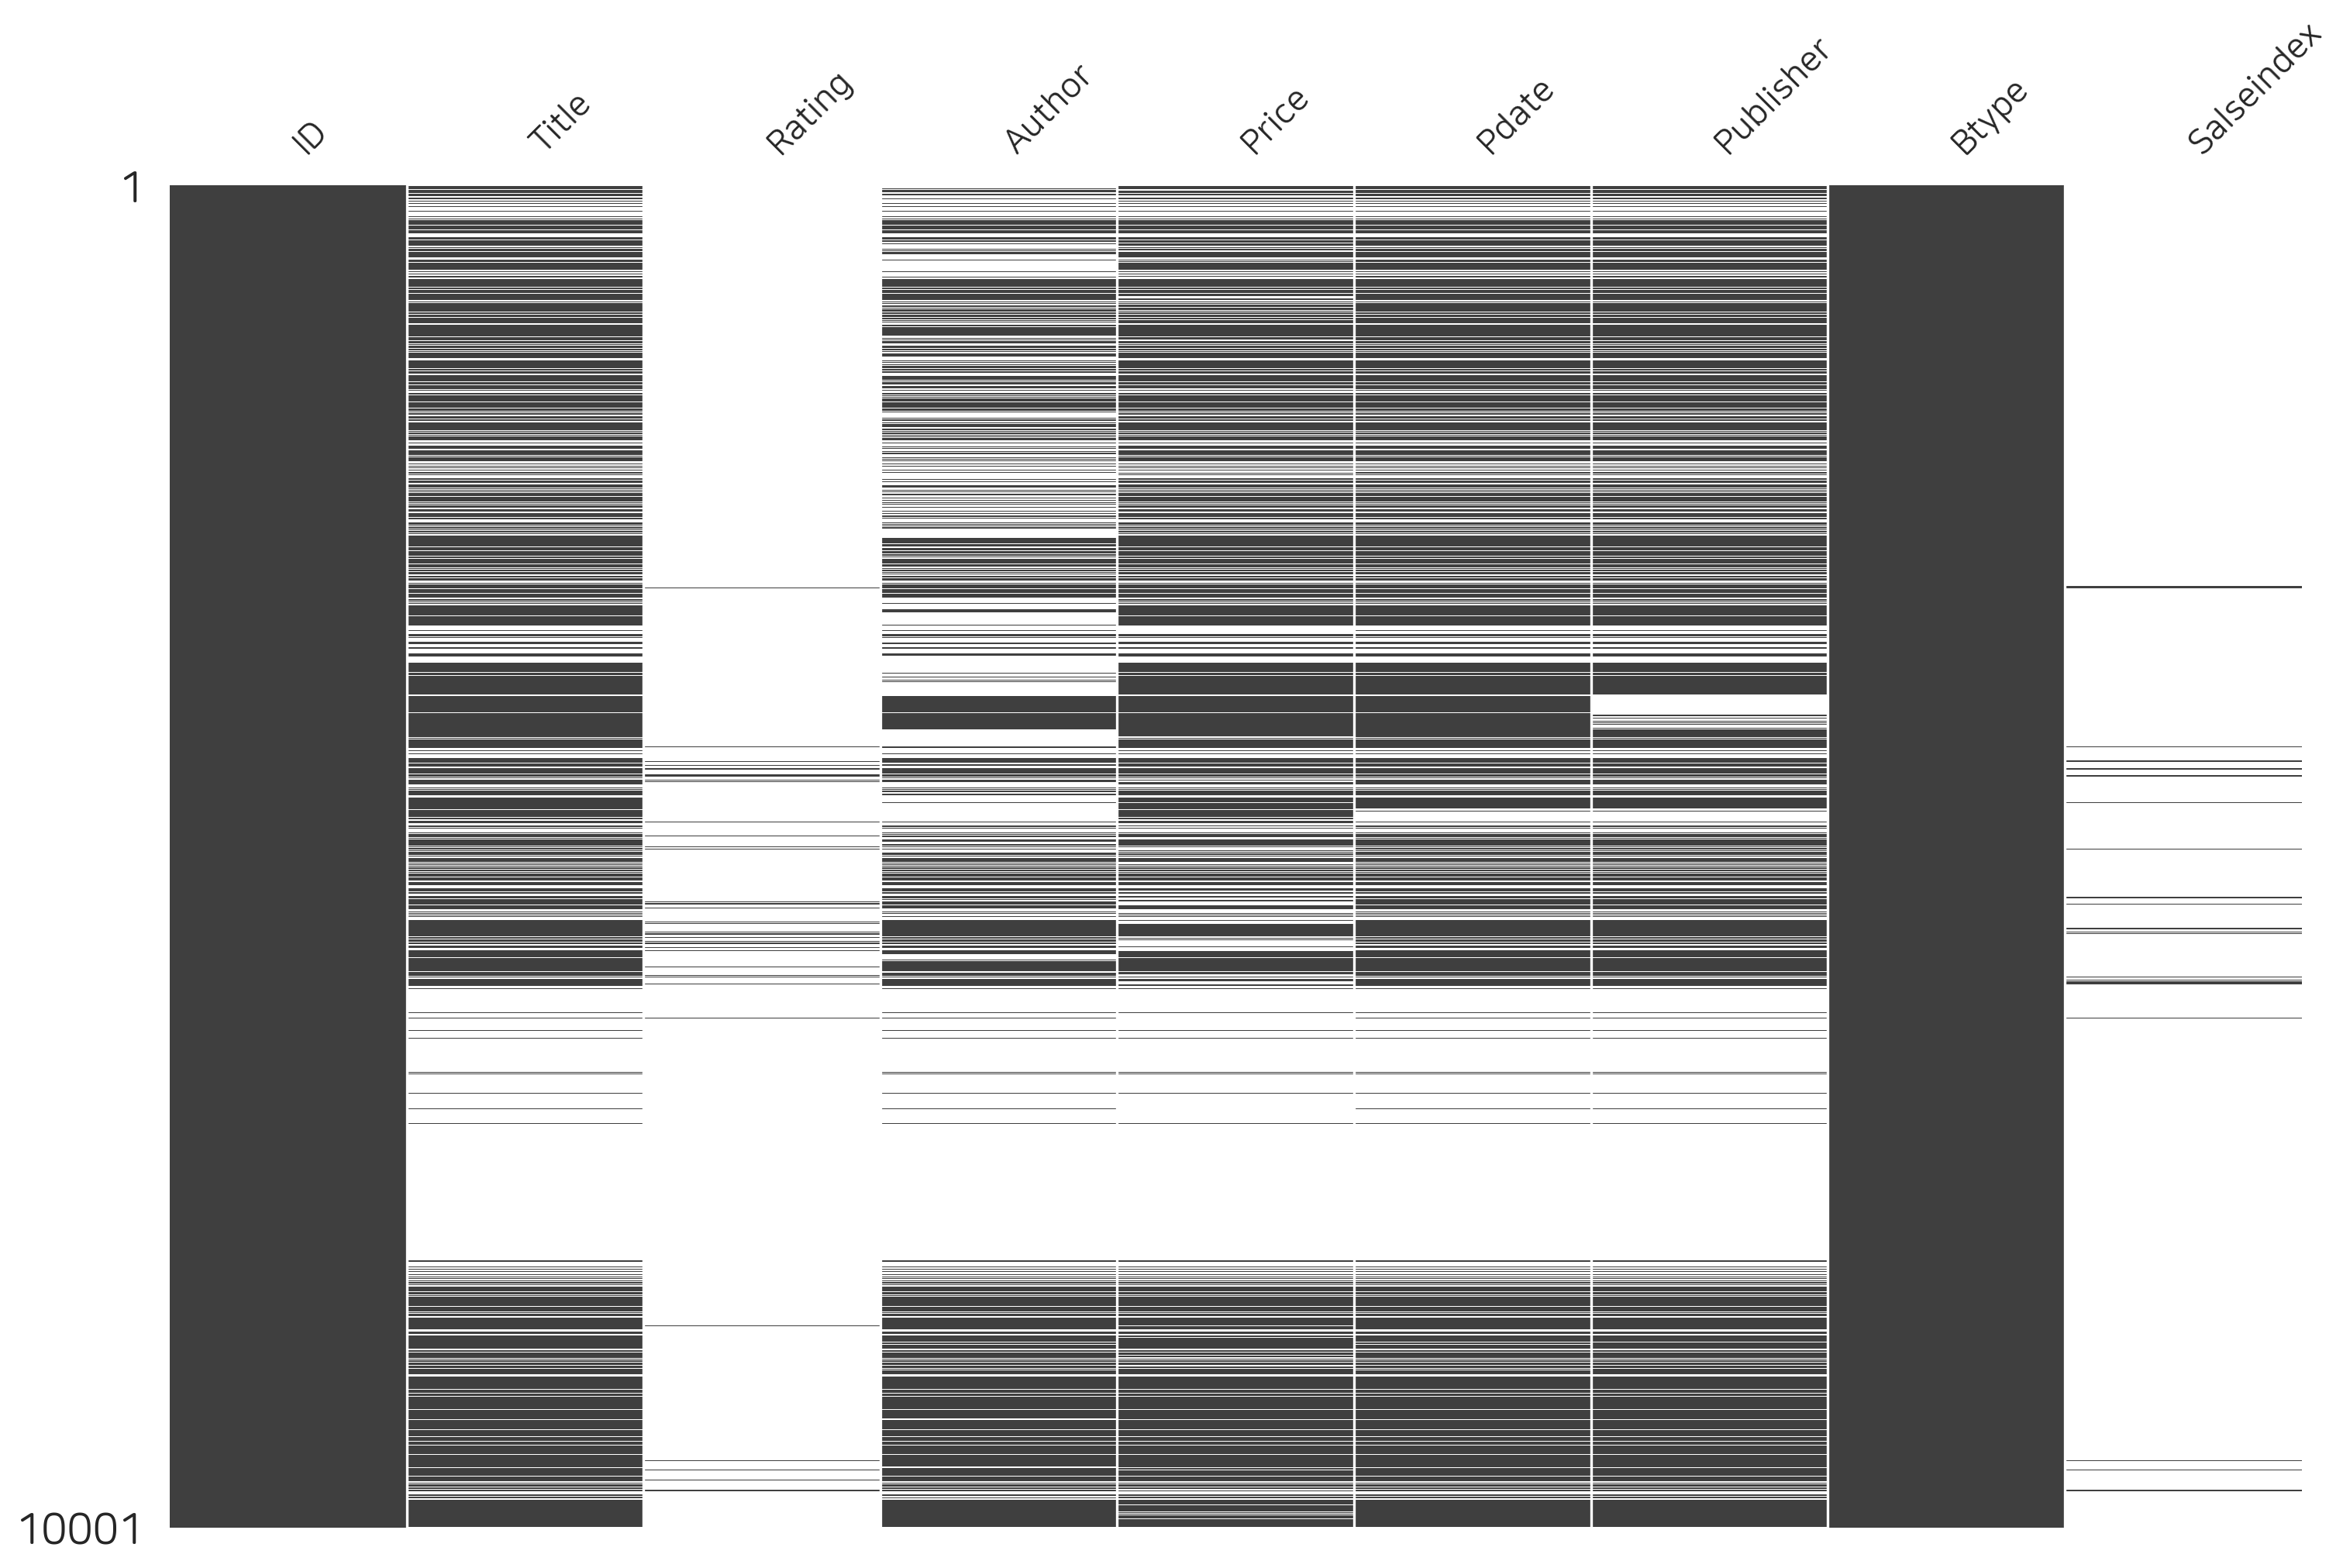

In [128]:
fig, ax = plt.subplots(figsize=(15,10))

msno.matrix(book, ax=ax, sparkline=False);

In [129]:
# 결측치 확인
print("결측치 확인:")
print(book.isnull().sum())

# 결측치 비율 계산
print("\n결측치 비율:")
print(book.isnull().mean() * 100)

결측치 확인:
ID               0
Title         4201
Rating        9752
Author        5552
Price         4598
Pdate         4278
Publisher     4450
Btype            0
Salseindex    9789
dtype: int64

결측치 비율:
ID             0.000000
Title         42.005799
Rating        97.510249
Author        55.514449
Price         45.975402
Pdate         42.775722
Publisher     44.495550
Btype          0.000000
Salseindex    97.880212
dtype: float64


In [130]:
book

,ID,Title,Rating,Author,Price,Pdate,Publisher,Btype,Salseindex
0,97043285,NaN,NaN,NaN,NaN,NaT,NaN,new,NaN
1,97043286,Principally Driven,NaN,NaN,32750.0,2020-05-26,Book-Art Press Solutions LLC,new,NaN
2,97043287,NaN,NaN,NaN,NaN,NaT,NaN,new,NaN
3,97043288,Assertiveness for Teens: 4 Easy to Use Methods...,NaN,NaN,27760.0,2020-05-22,Sophie Dalziel,new,NaN
4,97043289,Social Media Marketing for Small Business Owne...,NaN,NaN,49070.0,2020-05-26,Sophie Dalziel,new,NaN
...,...,...,...,...,...,...,...,...,...
9996,97053281,인류사를 가로지른 스마트한 발명들 50,NaN,알프리트 슈미츠,6700.0,2014-06-10,서해문집,old,NaN
9997,97053282,NaN,NaN,NaN,NaN,NaT,NaN,new,NaN
9998,97053283,NaN,NaN,NaN,NaN,NaT,NaN,new,NaN
9999,97053284,행복의 기원,NaN,서은국,10500.0,2014-05-22,21세기북스,old,NaN


In [131]:
# 결측치 처리
book["Price"].fillna(book["Price"].mean(), inplace=True)

/tmp/ipykernel_132535/3028523806.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  book["Price"].fillna(book["Price"].mean(), inplace=True)


In [132]:
# 'Rating'의 결측치를 평균값으로 대체
rating_mean = book[book['Rating'] != 'None']['Rating'].astype(float).mean()
book['Rating'] = book['Rating'].replace('None', rating_mean).astype(float)



# 'Price' 열에서 결측값 제거
book = book.dropna(subset=['Price'])


In [133]:
book

,ID,Title,Rating,Author,Price,Pdate,Publisher,Btype,Salseindex
0,97043285,NaN,NaN,NaN,11356.509347,NaT,NaN,new,NaN
1,97043286,Principally Driven,NaN,NaN,32750.000000,2020-05-26,Book-Art Press Solutions LLC,new,NaN
2,97043287,NaN,NaN,NaN,11356.509347,NaT,NaN,new,NaN
3,97043288,Assertiveness for Teens: 4 Easy to Use Methods...,NaN,NaN,27760.000000,2020-05-22,Sophie Dalziel,new,NaN
4,97043289,Social Media Marketing for Small Business Owne...,NaN,NaN,49070.000000,2020-05-26,Sophie Dalziel,new,NaN
...,...,...,...,...,...,...,...,...,...
9996,97053281,인류사를 가로지른 스마트한 발명들 50,NaN,알프리트 슈미츠,6700.000000,2014-06-10,서해문집,old,NaN
9997,97053282,NaN,NaN,NaN,11356.509347,NaT,NaN,new,NaN
9998,97053283,NaN,NaN,NaN,11356.509347,NaT,NaN,new,NaN
9999,97053284,행복의 기원,NaN,서은국,10500.000000,2014-05-22,21세기북스,old,NaN


### 데이터 정보 확인(고윳값)

In [134]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          10001 non-null  int64         
 1   Title       5800 non-null   object        
 2   Rating      249 non-null    float64       
 3   Author      4449 non-null   object        
 4   Price       10001 non-null  float64       
 5   Pdate       5723 non-null   datetime64[ns]
 6   Publisher   5551 non-null   object        
 7   Btype       10001 non-null  object        
 8   Salseindex  212 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 703.3+ KB


In [135]:
print(book['Price'].describe())

count     10001.000000
mean      11356.509347
std       11678.275808
min           0.000000
25%        5400.000000
50%       11356.509347
75%       11356.509347
max      180000.000000
Name: Price, dtype: float64


/tmp/ipykernel_132535/85991448.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


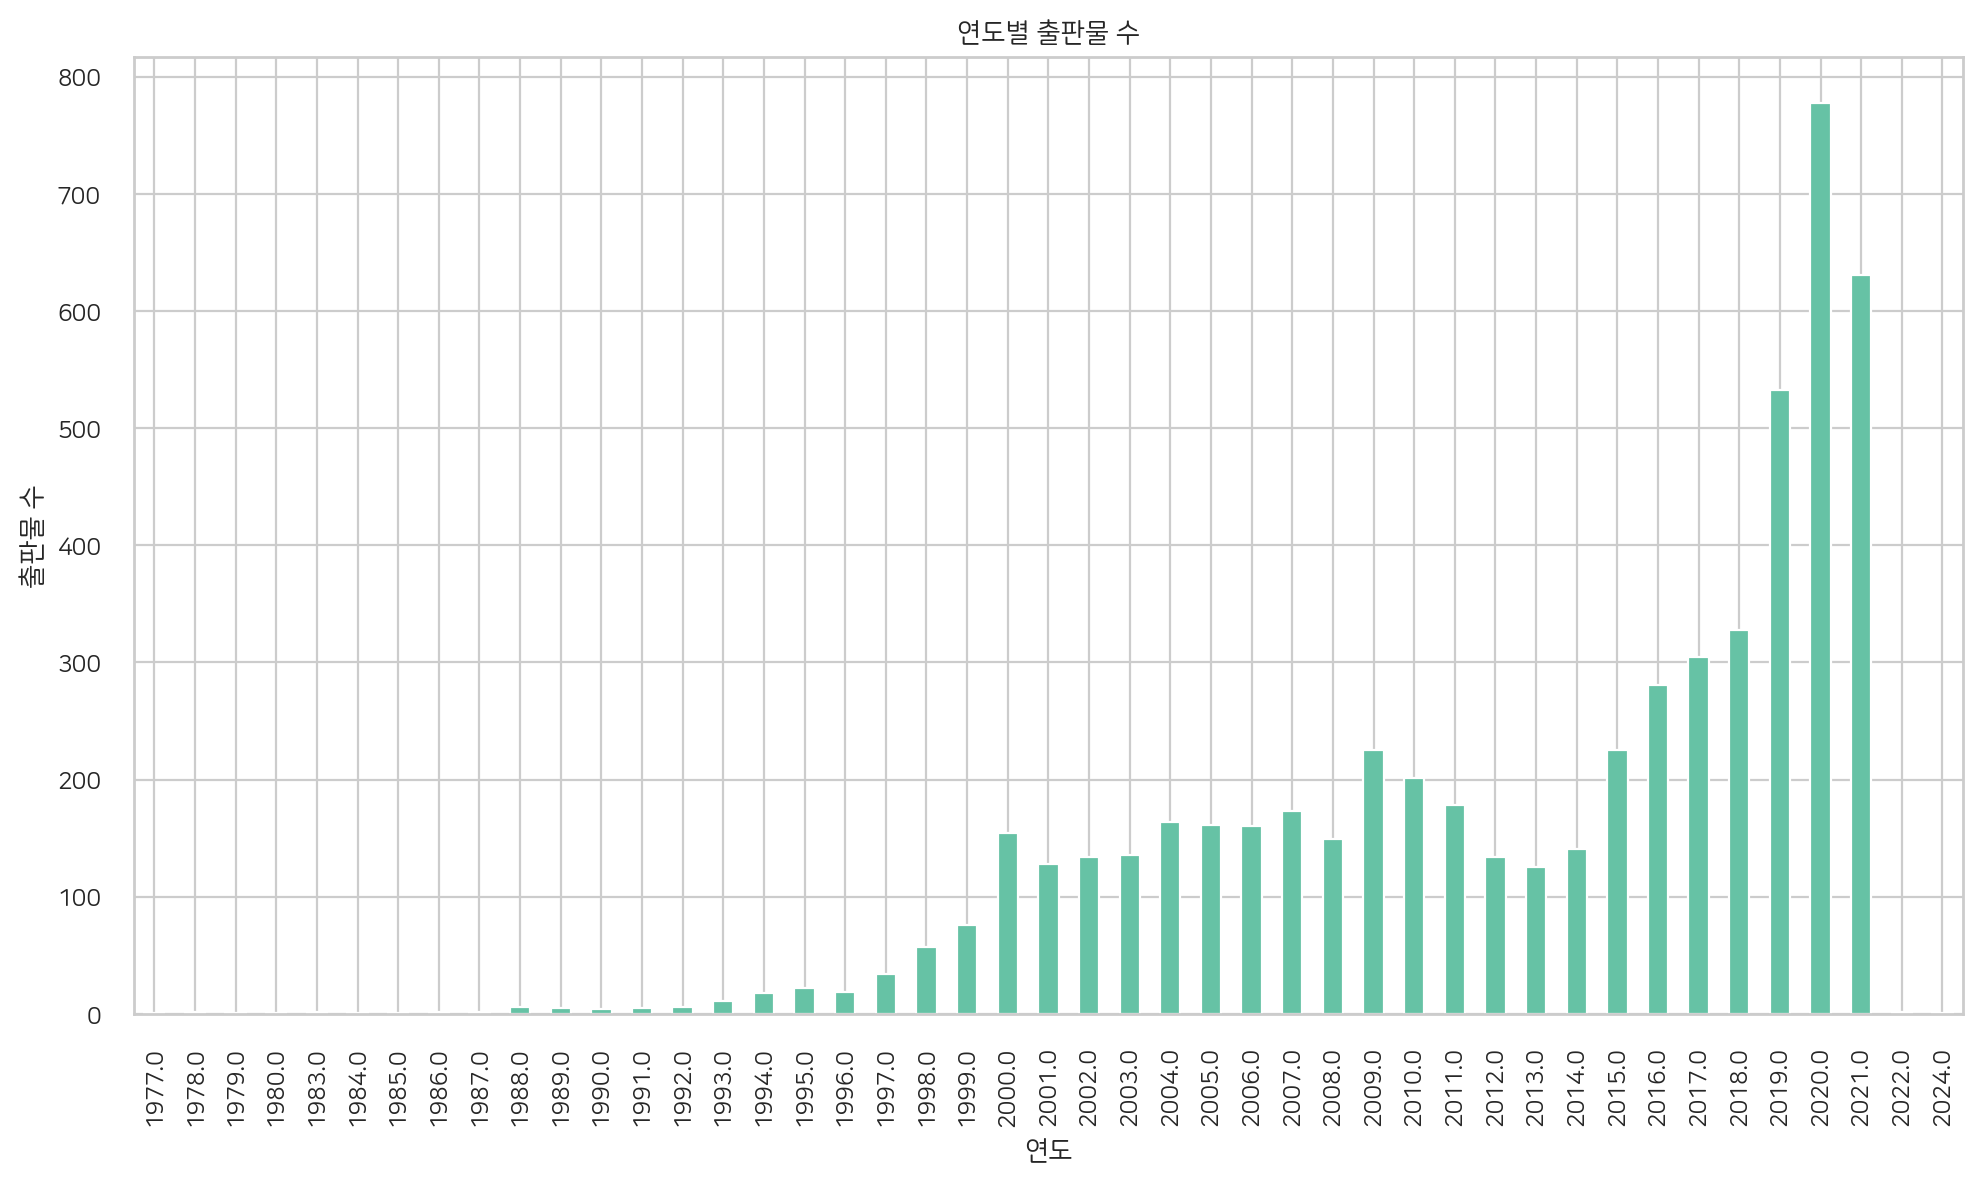

In [136]:
# 연도별로 데이터 집계
book['Year'] = book['Pdate'].dt.year
yearly_counts = book.groupby('Year').size().sort_index()

# 연도별 출판물 수 시각화
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar')
plt.title('연도별 출판물 수')
plt.xlabel('연도')
plt.ylabel('출판물 수')
plt.tight_layout()
plt.show();

### 상관관계 분석

In [137]:
print("\n상관관계:")
correlation_matrix = book.select_dtypes(exclude=object).corr()
print(correlation_matrix)


상관관계:
                  ID    Rating     Price     Pdate  Salseindex      Year
ID          1.000000  0.061017 -0.058563 -0.115312   -0.050655  0.351199
Rating      0.061017  1.000000  0.069002 -0.048131    0.009960  0.086170
Price      -0.058563  0.069002  1.000000 -0.008841    0.011308  0.302210
Pdate      -0.115312 -0.048131 -0.008841  1.000000    0.013389  0.999174
Salseindex -0.050655  0.009960  0.011308  0.013389    1.000000  0.037264
Year        0.351199  0.086170  0.302210  0.999174    0.037264  1.000000


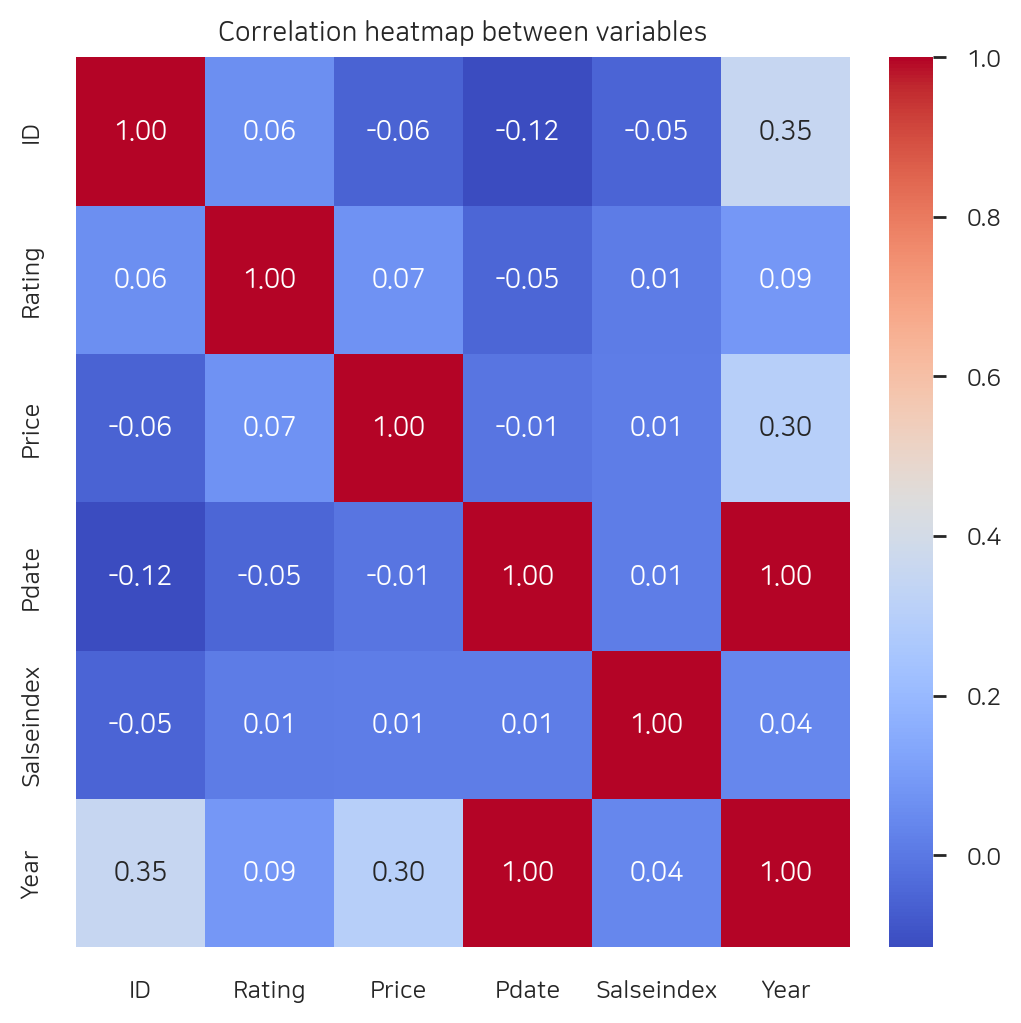

In [138]:
# 다변량 분석 - 히트맵
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation heatmap between variables")
plt.show()

### 분포 확인

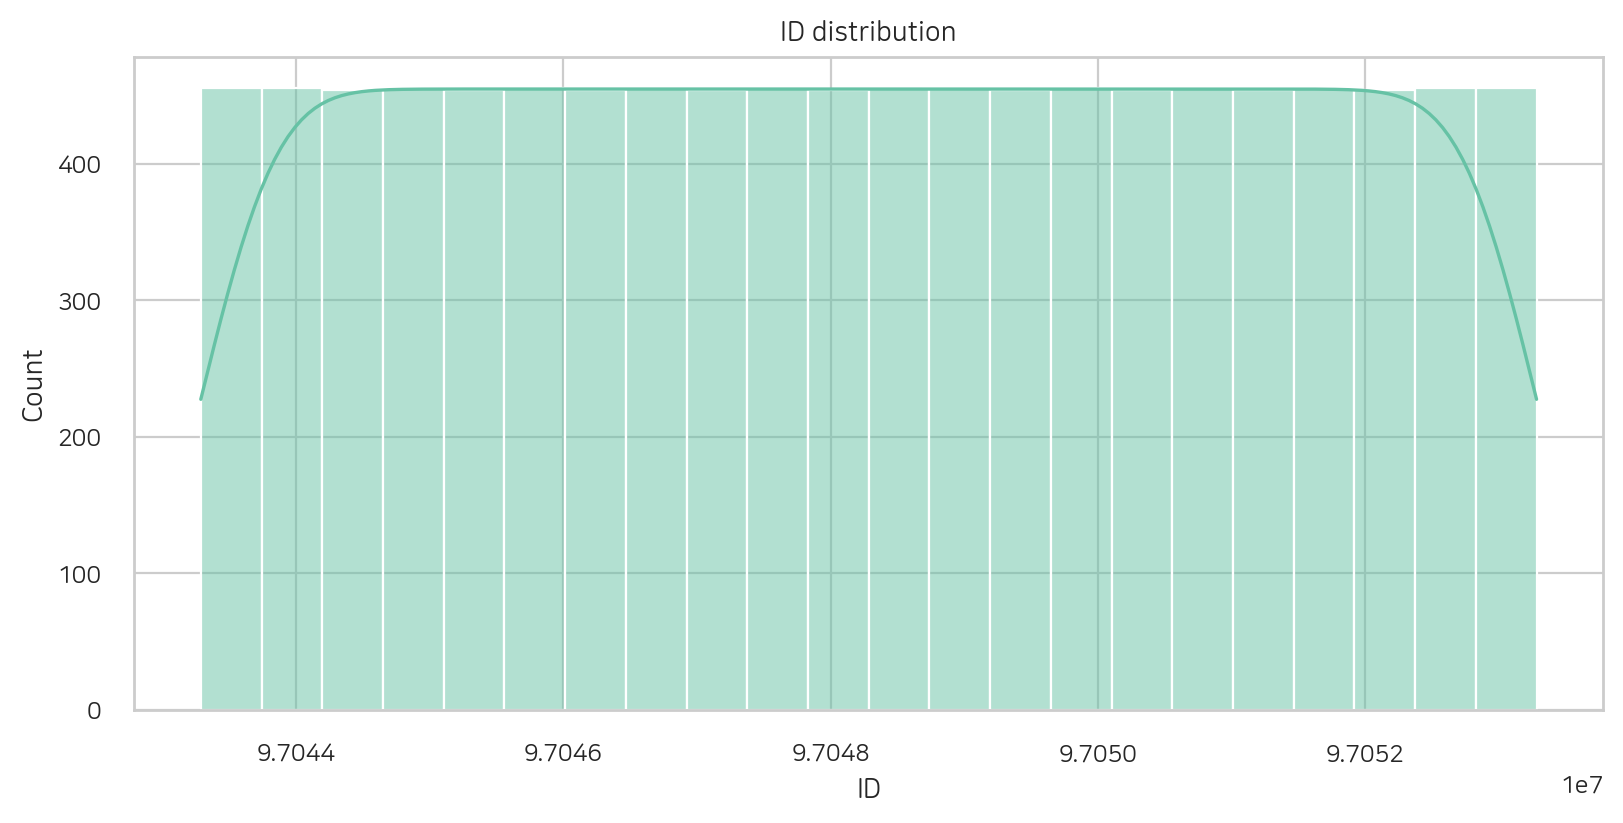

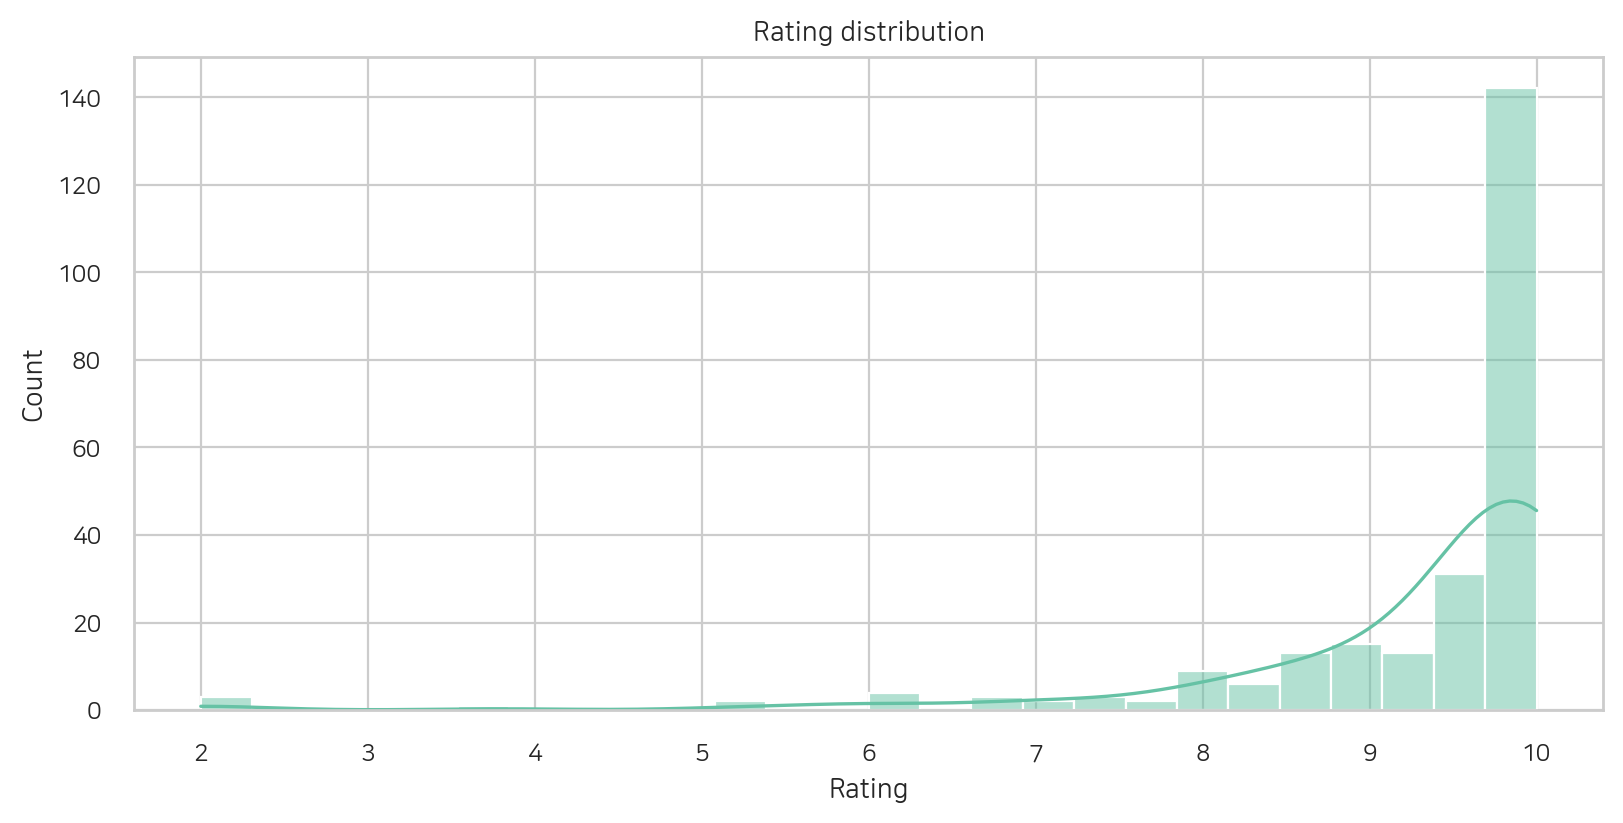

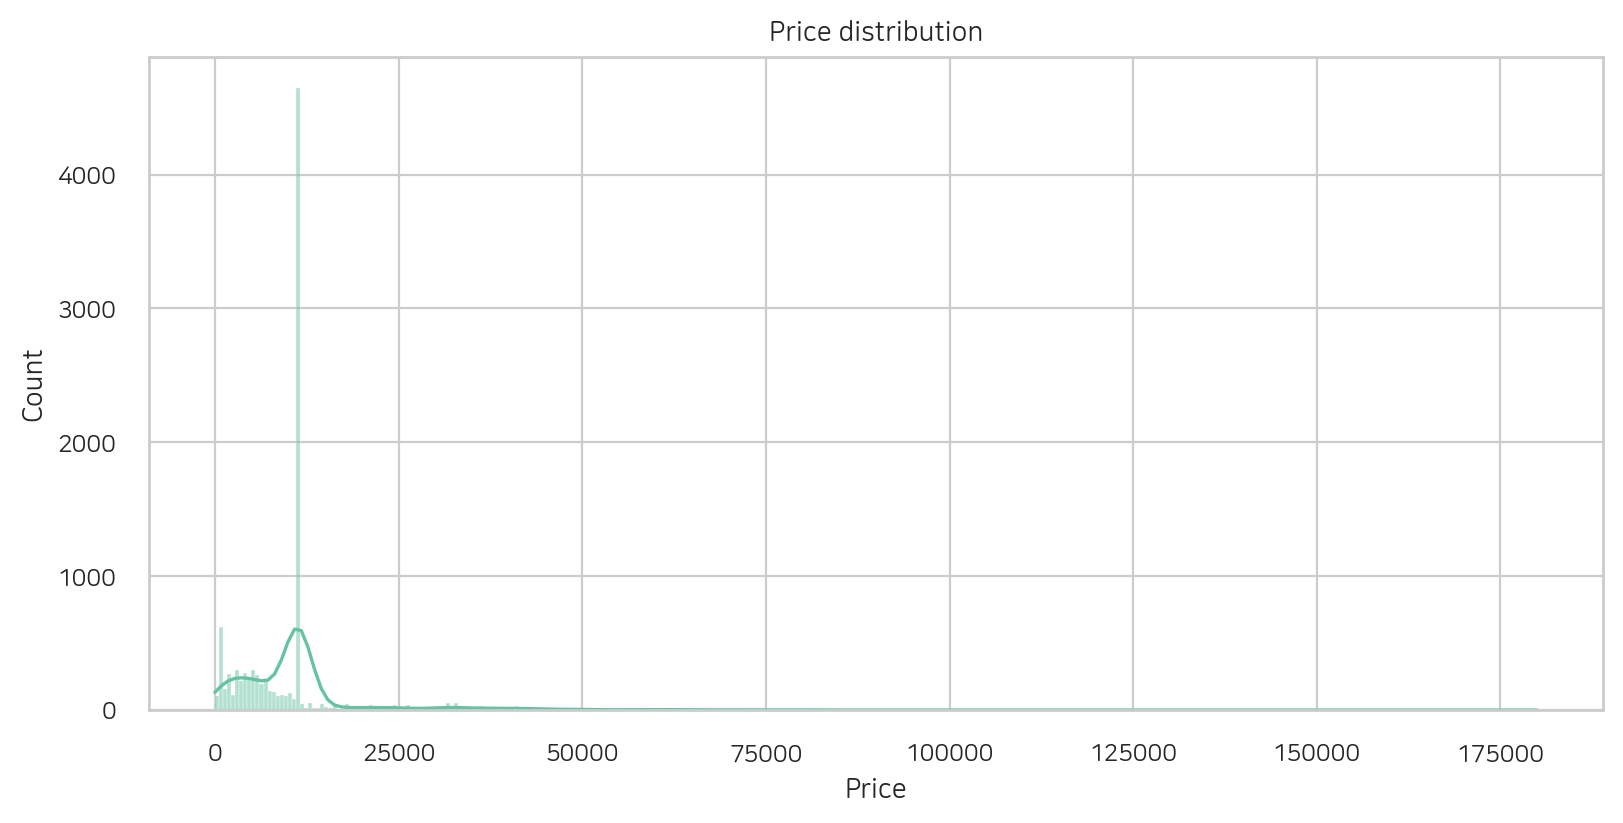

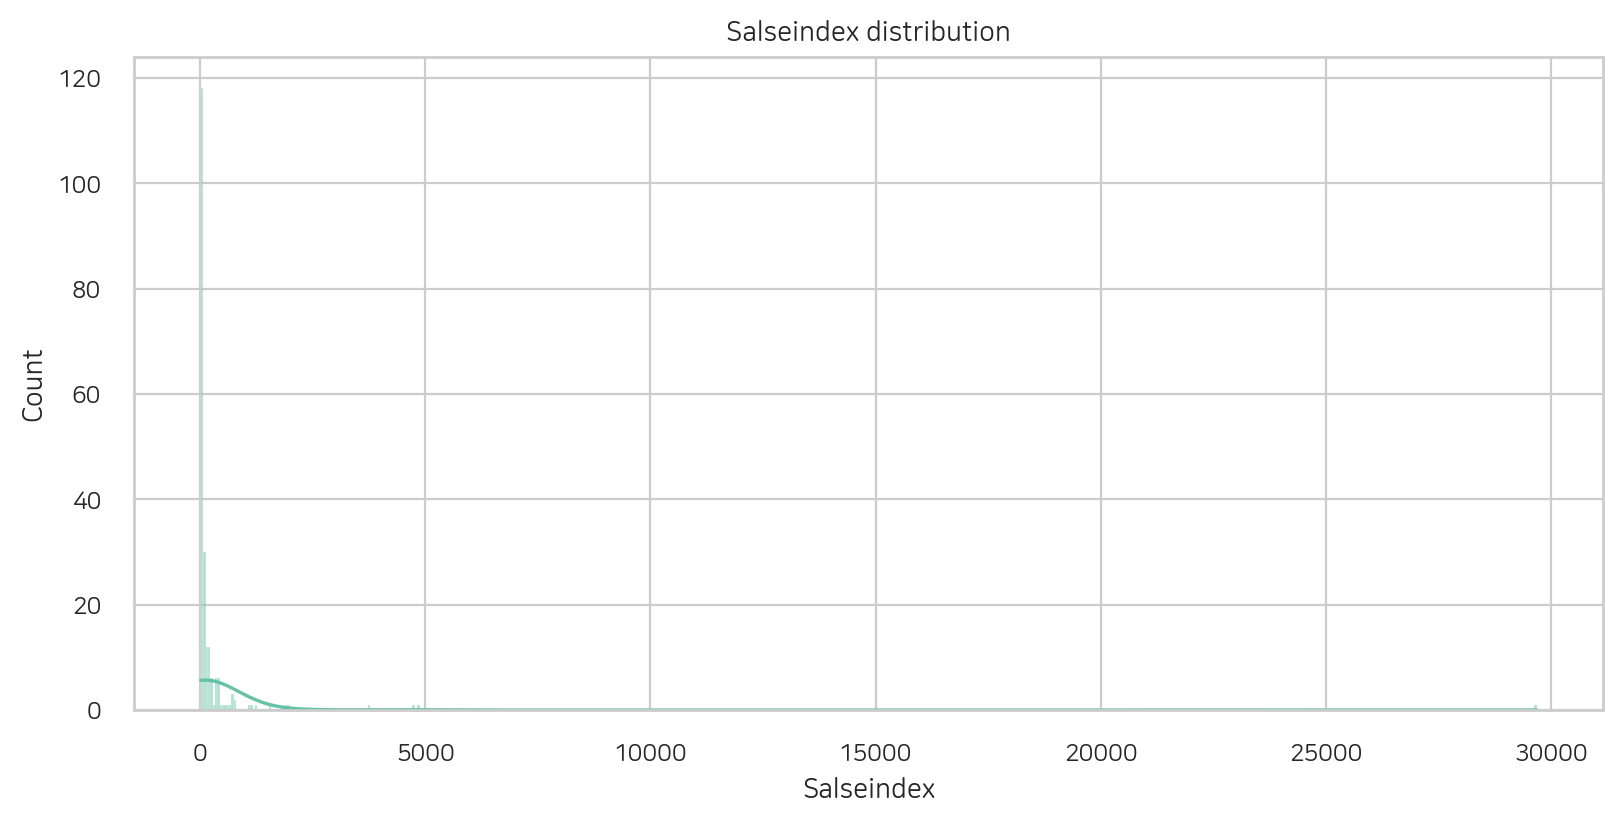

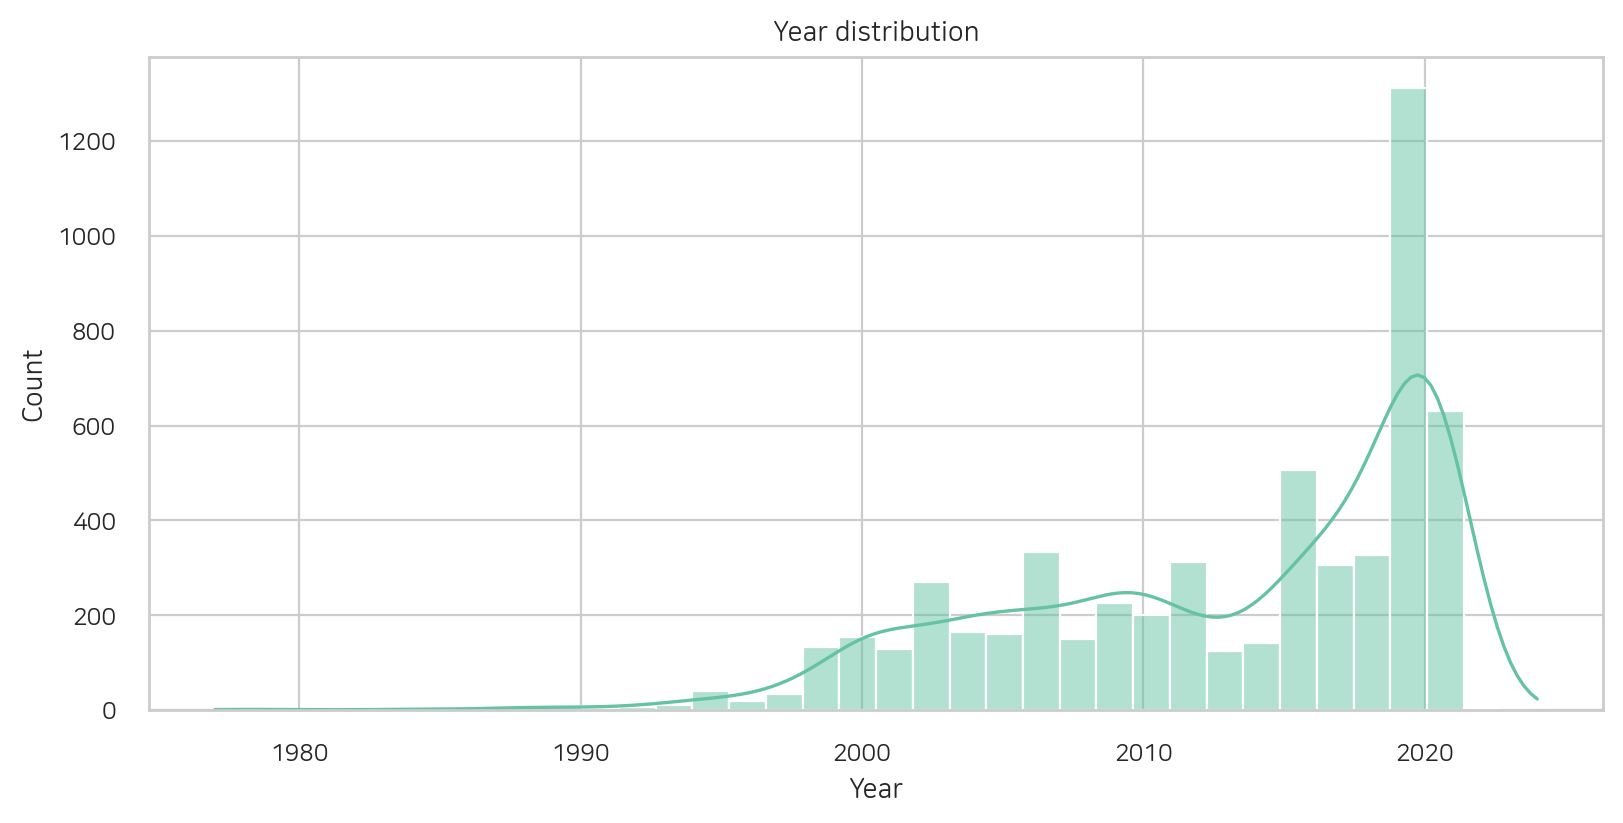

In [139]:
import seaborn as sns

# 수치형 변수 분포 확인
for col in book.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(book[col], kde=True)
    plt.title(col + " distribution")
    plt.show()



In [140]:
# 범주형 변수 분포 확인 - 범주형 변수 확인
book.select_dtypes(include=['object']).columns

Index(['Title', 'Author', 'Publisher', 'Btype'], dtype='object')

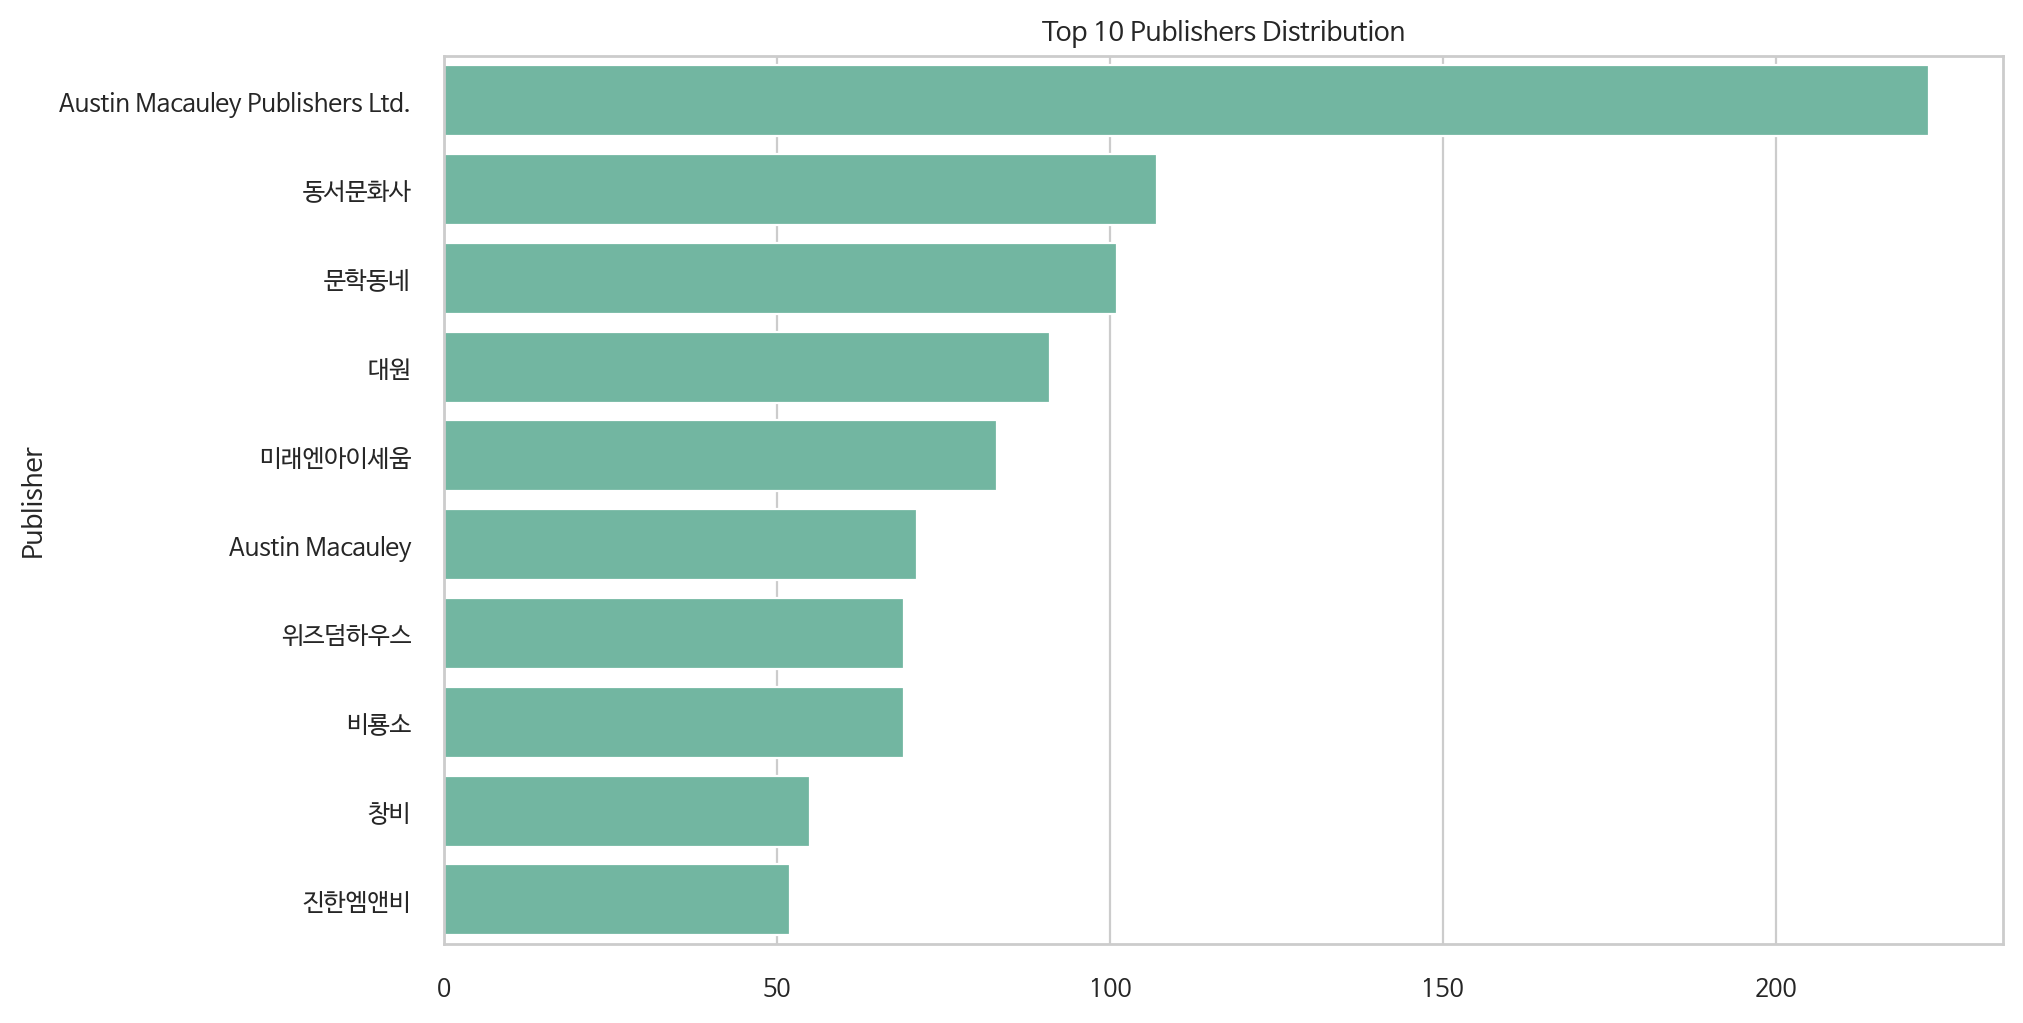

In [141]:
plt.rc('font', family='NanumBarunGothic')
# sns.set(font="Malgun Gothic",
# rc={"axes.unicode_minus":False}, style='white')


# 범주형 변수 분포 확인 - Publisher

# 가장 많이 등장하는 상위 10개의 출판사 추출
top_publishers = book['Publisher'].value_counts().head(10)

# 상위 10개의 출판사에 대한 countplot 그리기
plt.figure(figsize=(10, 5))
sns.barplot(y=top_publishers.index, x=top_publishers.values)
plt.title('Top 10 Publishers Distribution')
plt.show()


### 다변량 분석 - 산점도 행렬

/home/tommy/miniconda3/envs/311/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


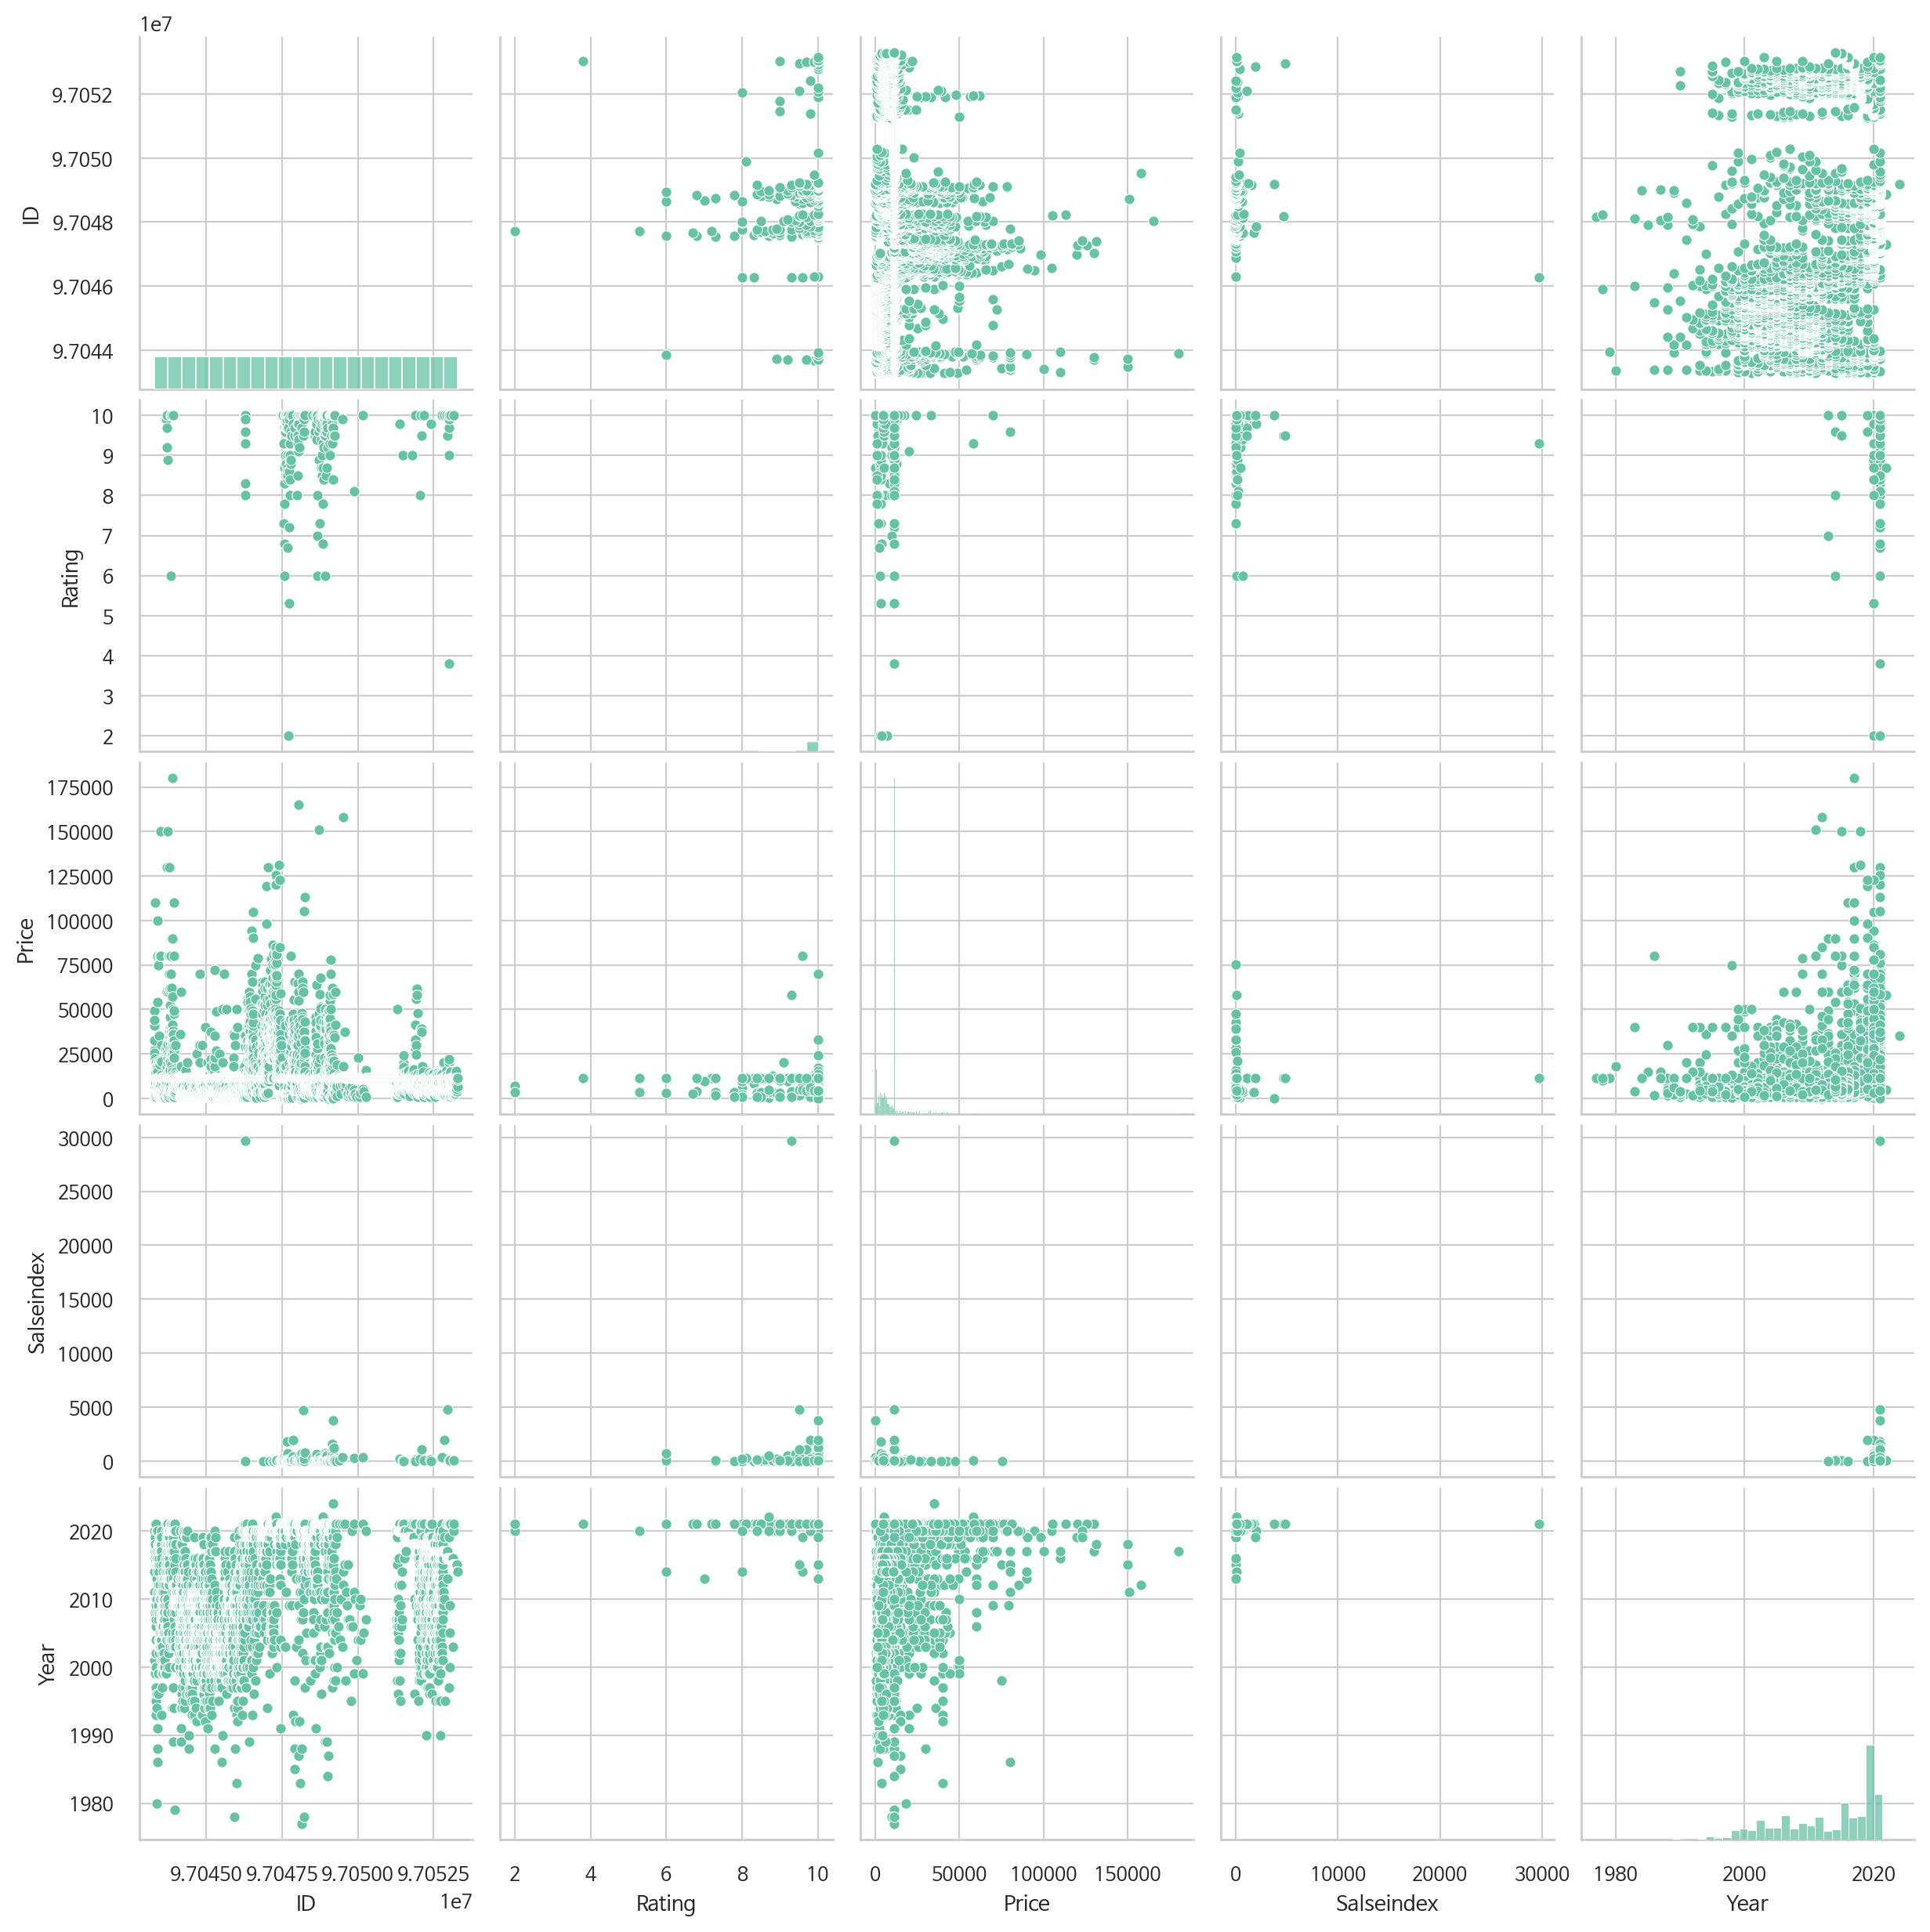

In [142]:
sns.pairplot(book.select_dtypes(include=['float64', 'int64']))
plt.show()
